In [1]:
from lib.ekyn import *
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ekyn_ids = get_ekyn_ids()

n_samples = len(ekyn_ids) * 17280
n_seconds = n_samples * 10
n_hours = n_seconds / 3600
print(f'{n_hours} hours')

768.0 hours


(0.0, 0.0001)

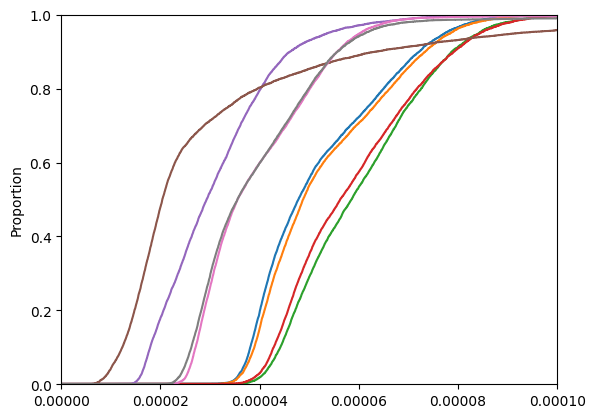

In [4]:
eeg_data = {}
for id in ekyn_ids[:4]:
    eeg_data[id] = {}
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt(id=id,condition=condition)
        eeg_data[id][condition] = X
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
labels = []
stds = []
for i,rat in enumerate(eeg_data):
    for condition in eeg_data[rat]:
        labels.append(f'{rat}{condition}')
        std,mean = torch.std_mean(eeg_data[rat][condition],dim=1)
        stds.append(std)
        sns.ecdfplot(std)
plt.xlim([0,.0001])


In [84]:
from scipy.stats import wasserstein_distance

emds = torch.zeros(32,32)
for i in range(32):
    for j in range(32):
        emd = wasserstein_distance(stds[i], stds[j])
        emds[i,j] = emd

In [121]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform
# Condense the distance matrix
condensed_emd_matrix = squareform(emds)

# Perform hierarchical clustering on the condensed distance matrix
linked = linkage(condensed_emd_matrix, method='single')

clusters = fcluster(linked, 4, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 3, 1, 1, 1, 1, 1, 1], dtype=int32)

/opt/homebrew/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


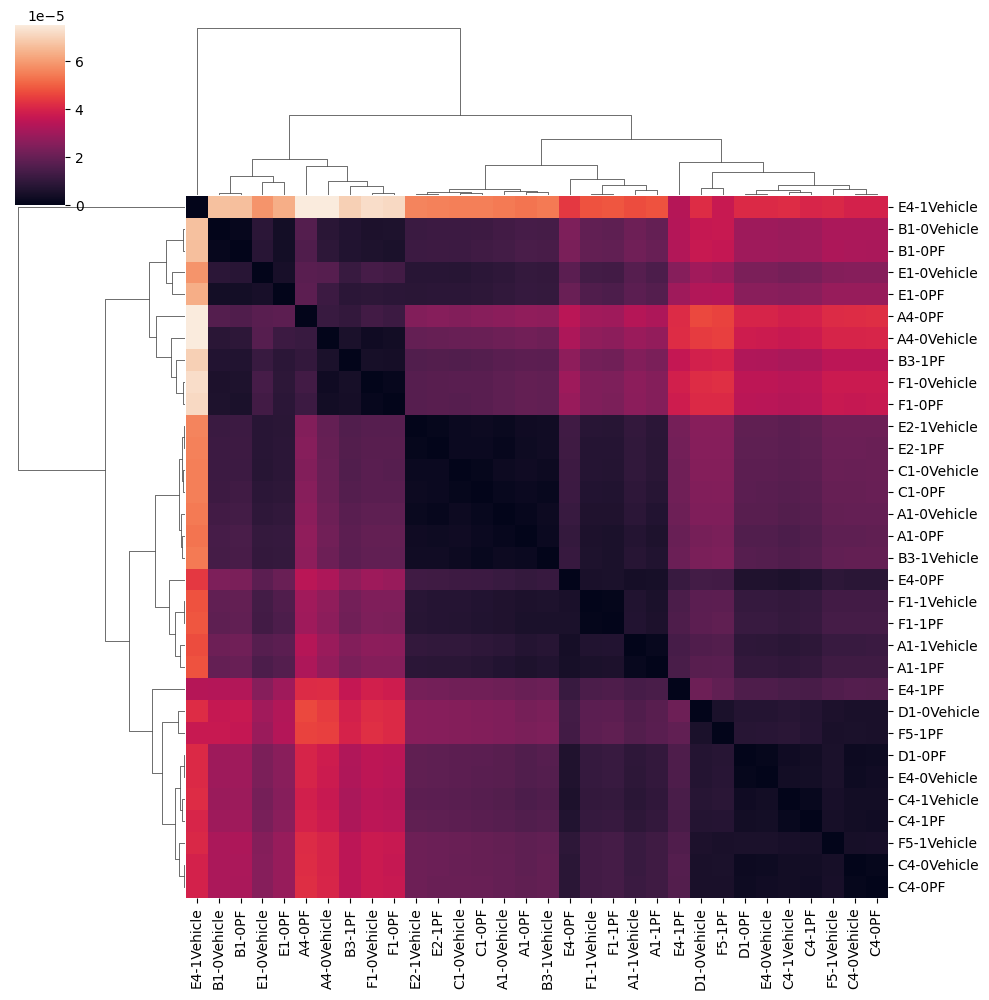

In [116]:
sns.clustermap(emds,xticklabels=labels,yticklabels=labels)

(0.0, 0.0002)

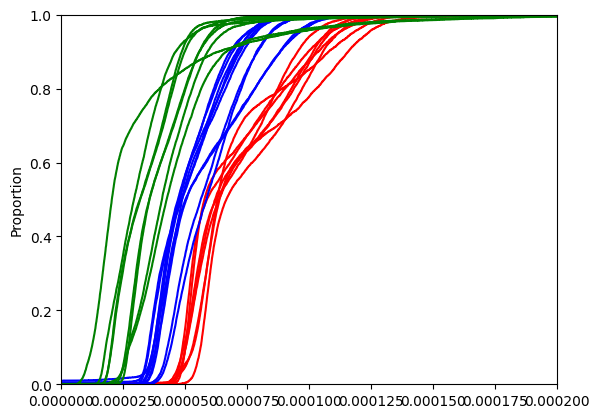

In [138]:
eeg_data = {}
groups = [('C4-0','PF'),('C4-0','Vehicle'),('D1-0','PF'),('D1-0','Vehicle'),('C4-1','PF'),('C4-1','Vehicle'),('F5-1','Vehicle'),('F5-1','PF')]
for id,condition in groups:
    X,y = load_ekyn_pt(id=id,condition=condition)
    eeg_data[f'{id}_{condition}'] = X

labels = []
stds = []
for id,condition in groups:
        std,mean = torch.std_mean(eeg_data[f'{id}_{condition}'],dim=1)
        stds.append(std)
        sns.ecdfplot(std,color='red')

eeg_data = {}
groups = [('E2-1','PF'),('E2-1','Vehicle'),('C1-0','PF'),('C1-0','Vehicle'),('A1-0','PF'),('A1-0','Vehicle'),('F1-1','Vehicle'),('F1-1','PF'),('A1-1','Vehicle'),('A1-1','PF')]
for id,condition in groups:
    X,y = load_ekyn_pt(id=id,condition=condition)
    eeg_data[f'{id}_{condition}'] = X

labels = []
stds = []
for id,condition in groups:
        std,mean = torch.std_mean(eeg_data[f'{id}_{condition}'],dim=1)
        stds.append(std)
        sns.ecdfplot(std,color='blue')

eeg_data = {}
groups = [('B1-0','PF'),('B1-0','Vehicle'),('E1-0','Vehicle'),('E1-0','PF'),('A4-0','Vehicle'),('A4-0','PF'),('F1-0','Vehicle'),('F1-0','PF')]
for id,condition in groups:
    X,y = load_ekyn_pt(id=id,condition=condition)
    eeg_data[f'{id}_{condition}'] = X

labels = []
stds = []
for id,condition in groups:
        std,mean = torch.std_mean(eeg_data[f'{id}_{condition}'],dim=1)
        stds.append(std)
        sns.ecdfplot(std,color='green')
plt.xlim([0,.0002])


(0.0, 0.0002)

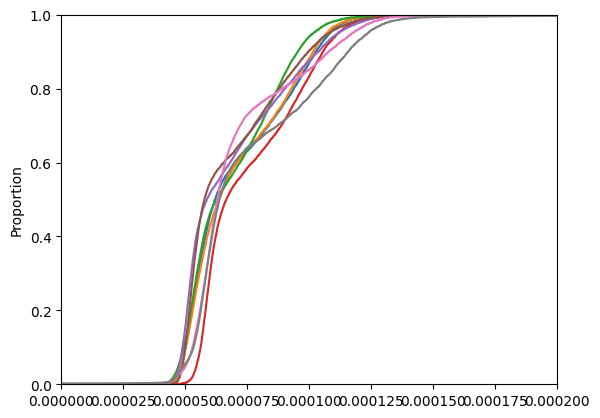

In [139]:
eeg_data = {}
groups = [('C4-0','PF'),('C4-0','Vehicle'),('D1-0','PF'),('D1-0','Vehicle'),('C4-1','PF'),('C4-1','Vehicle'),('F5-1','Vehicle'),('F5-1','PF')]
for id,condition in groups:
    X,y = load_ekyn_pt(id=id,condition=condition)
    eeg_data[f'{id}_{condition}'] = X

labels = []
stds = []
for id,condition in groups:
        std,mean = torch.std_mean(eeg_data[f'{id}_{condition}'],dim=1)
        stds.append(std)
        sns.ecdfplot(std)
plt.xlim([0,.0002])

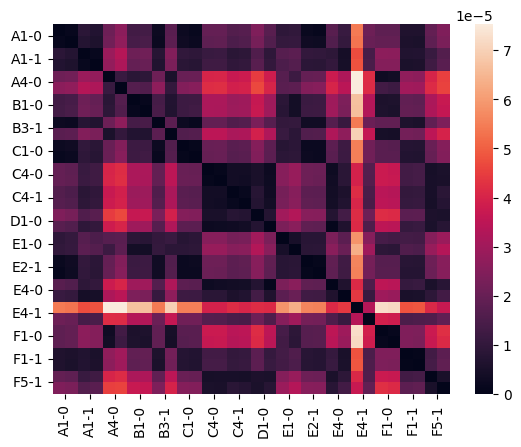

In [110]:
sns.heatmap(emds)
ticks,labels = plt.xticks()
plt.xticks(ticks=ticks + .5,labels=labels,rotation=90)
plt.yticks(ticks=ticks + .5,labels=labels,rotation=0)
plt.gca().set_yticklabels(ekyn_ids);
plt.gca().set_xticklabels(ekyn_ids);

Text(0.5, 0, 'variance (microV)')

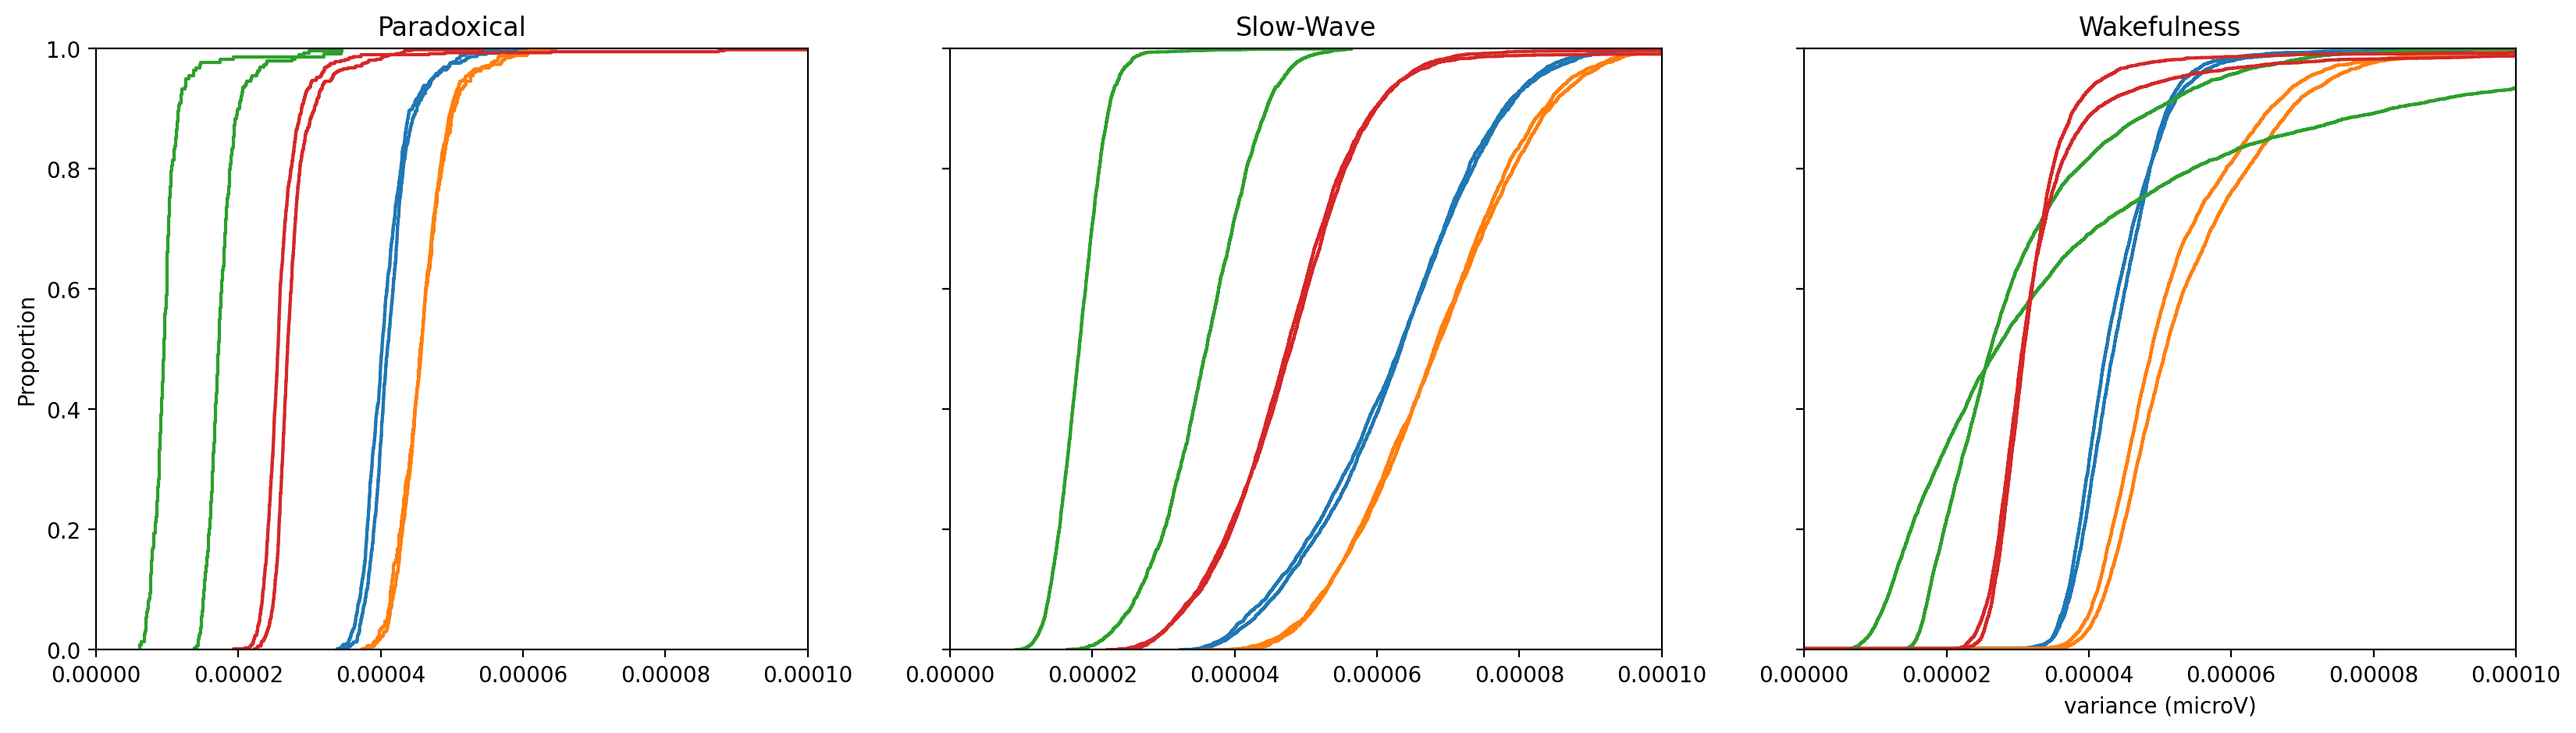

In [54]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5),dpi=200,sharey=True,sharex=True)
for stage in range(3):
    eeg_data = {}
    for id in ekyn_ids[:4]:
        eeg_data[id] = {}
        for condition in ['Vehicle','PF']:
            X,y = load_ekyn_pt(id=id,condition=condition)
            eeg_data[id][condition] = X[torch.where(y.argmax(axis=1) == stage)[0]]

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    for i,rat in enumerate(eeg_data):
        for condition in eeg_data[rat]:
            std,mean = torch.std_mean(eeg_data[rat][condition],dim=1)
            sns.ecdfplot(std,color=colors[i],ax=axes[stage])
plt.xlim([0,.0001])
axes[0].set_title(f'Paradoxical')
axes[1].set_title(f'Slow-Wave')
axes[2].set_title(f'Wakefulness')
plt.xlabel('variance (microV)')

(0.0, 0.0002)

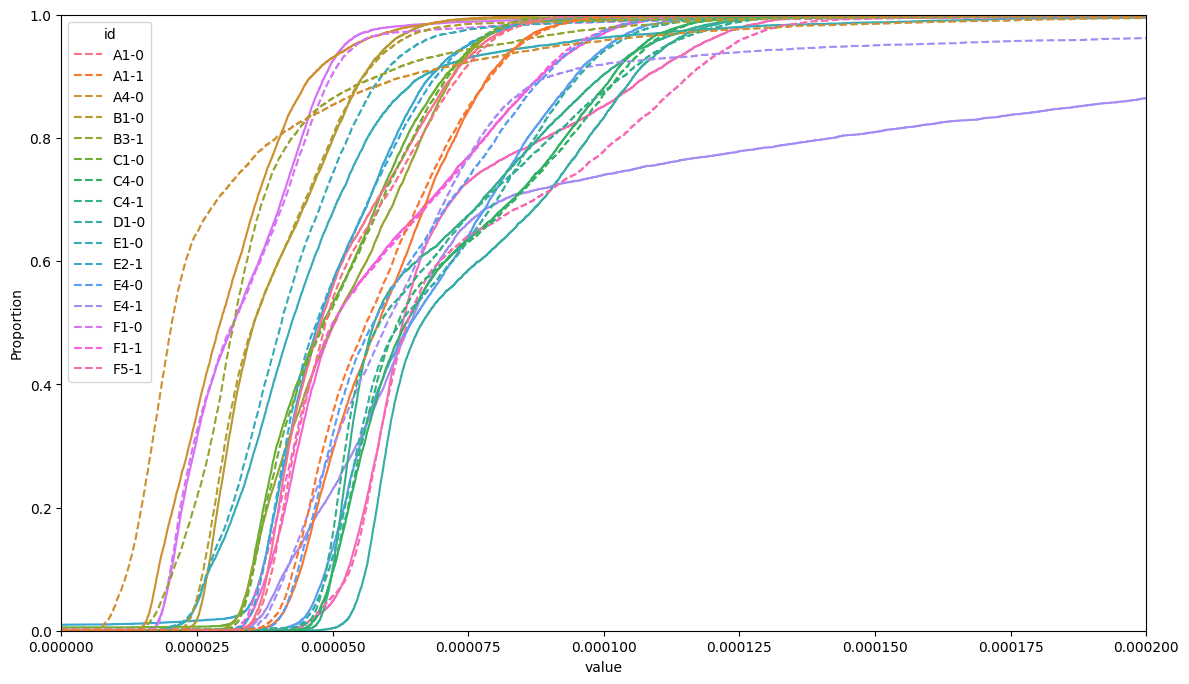

In [9]:
df = pd.DataFrame()

plt.figure(figsize=(14,8))
for id in ekyn_ids:
    for condition in ['Vehicle','PF']:
        X,y = load_ekyn_pt(id=id,condition=condition)
        std,mean = torch.std_mean(X,dim=1)
        df[f'{id}_{condition}'] = std
        
df_long = df.melt()
df_long[['id','condition']] = df_long.variable.str.split('_',expand=True)
sns.ecdfplot(df_long[df_long.condition == 'Vehicle'],x='value',hue='id',linestyle='-')
sns.ecdfplot(df_long[df_long.condition == 'PF'],x='value',hue='id',linestyle='--')
# std,mean = torch.std_mean(eeg,dim=1)
# sns.ecdfplot(std,linewidth=2)
